In [2]:
library(dplyr)
library(ggplot2)

df <- read.csv(paste("/Users/kevin/Desktop/",
                     "USP_587_data/OHAS_v2/household.csv", sep=""))

In [3]:
print("Table 1. Summary Statistics of Selected Columns")

df %>%
    select(resty, income, hhveh, htrips) %>%
    summary()

[1] "Table 1. Summary Statistics of Selected Columns"


     resty           income          hhveh           htrips      
 Min.   :1.000   Min.   : 1.00   Min.   :0.000   Min.   : 0.000  
 1st Qu.:1.000   1st Qu.: 4.00   1st Qu.:1.000   1st Qu.: 4.000  
 Median :1.000   Median : 5.00   Median :2.000   Median : 8.000  
 Mean   :1.402   Mean   :11.32   Mean   :1.948   Mean   : 9.815  
 3rd Qu.:1.000   3rd Qu.: 7.00   3rd Qu.:2.000   3rd Qu.:14.000  
 Max.   :9.000   Max.   :99.00   Max.   :8.000   Max.   :81.000  

In [4]:
print("Table 2. Frequency of Income Groups")
inc.group <- group_by(df, income)  %>%
    filter(income != 99)
inc.group.summary <- summarize(inc.group, count=n())
inc.group.summary

[1] "Table 2. Frequency of Income Groups"


income,count
1,314
2,485
3,479
4,743
5,1321
6,1134
7,1013
8,530


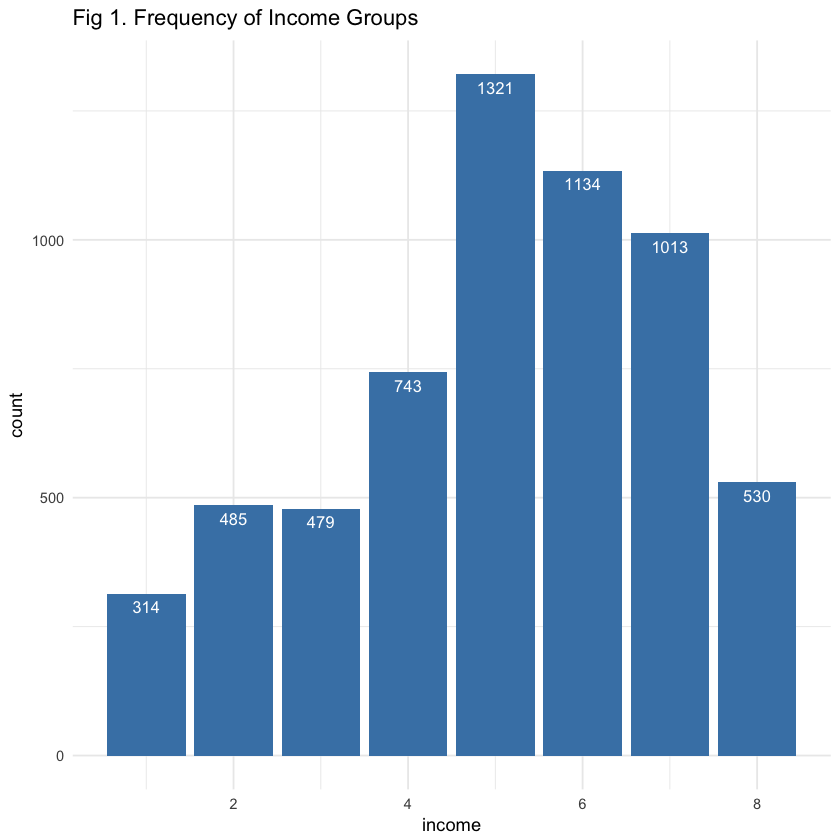

In [5]:
inc.group.summary %>% 
    ggplot(aes(x=income, y=count)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=count), vjust=1.6, color="white", size=3.5) +
    labs(title="Fig 1. Frequency of Income Groups") +
    theme_minimal()

In [6]:
print("Table 3. Frequency of Total Household Vehicles")
veh.group <- group_by(df, hhveh)
veh.group.summary <- summarize(veh.group, count=n())
veh.group.summary

[1] "Table 3. Frequency of Total Household Vehicles"


hhveh,count
0,347
1,1990
2,2554
3,1042
4,343
5,106
6,43
7,12
8,12


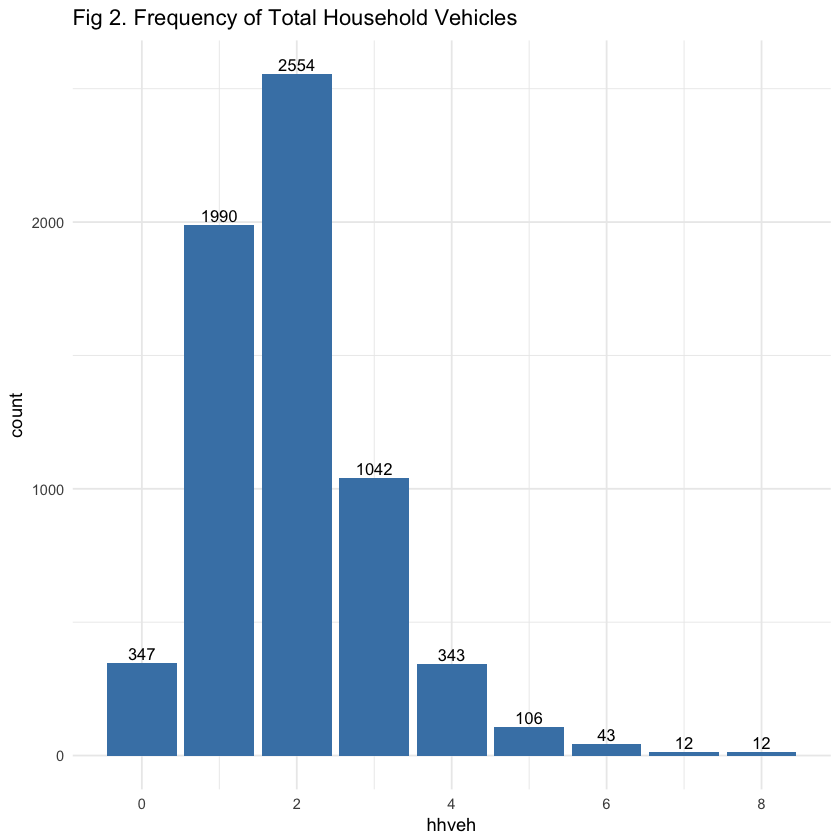

In [7]:
veh.group.summary %>% 
    ggplot(aes(x=hhveh, y=count)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=count), vjust=-0.3, color="black", size=3.5) +
    labs(title="Fig 2. Frequency of Total Household Vehicles") +
    theme_minimal()

In [8]:
print("Table 4. Household Trips by Total Household Vehicles")
veh.group <- group_by(df, hhveh)
veh.group.summary <- summarize(veh.group, count=n(), htrips_avg=mean(htrips))
veh.group.summary

[1] "Table 4. Household Trips by Total Household Vehicles"


hhveh,count,htrips_avg
0,347,7.925072
1,1990,6.988945
2,2554,11.066562
3,1042,11.666027
4,343,12.160350
5,106,12.377358
6,43,10.906977
7,12,13.416667
8,12,8.916667


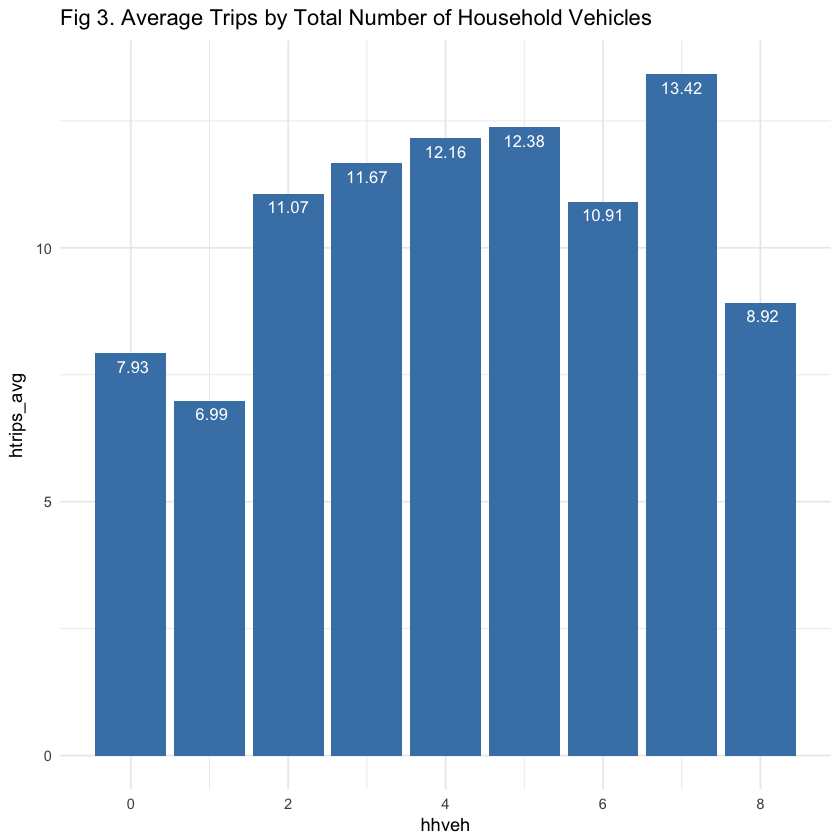

In [9]:
veh.group.summary %>% 
    ggplot(aes(x=hhveh, y=htrips_avg)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=format(htrips_avg, digits = 3)), 
                                vjust=1.6, color="white", size=3.5)+
    labs(title="Fig 3. Average Trips by Total Number of Household Vehicles") +
    theme_minimal()

In [10]:
print("Table 5. Household Trips by Income Group")
inc.group <- group_by(df, income)  %>%
    filter(income != 99)
inc.group.summary <- summarize(inc.group, count=n(), htrips_avg=mean(htrips))
inc.group.summary

[1] "Table 5. Household Trips by Income Group"


income,count,htrips_avg
1,314,6.359873
2,485,6.837113
3,479,6.828810
4,743,8.079408
5,1321,9.677517
6,1134,11.241623
7,1013,12.244817
8,530,12.622642


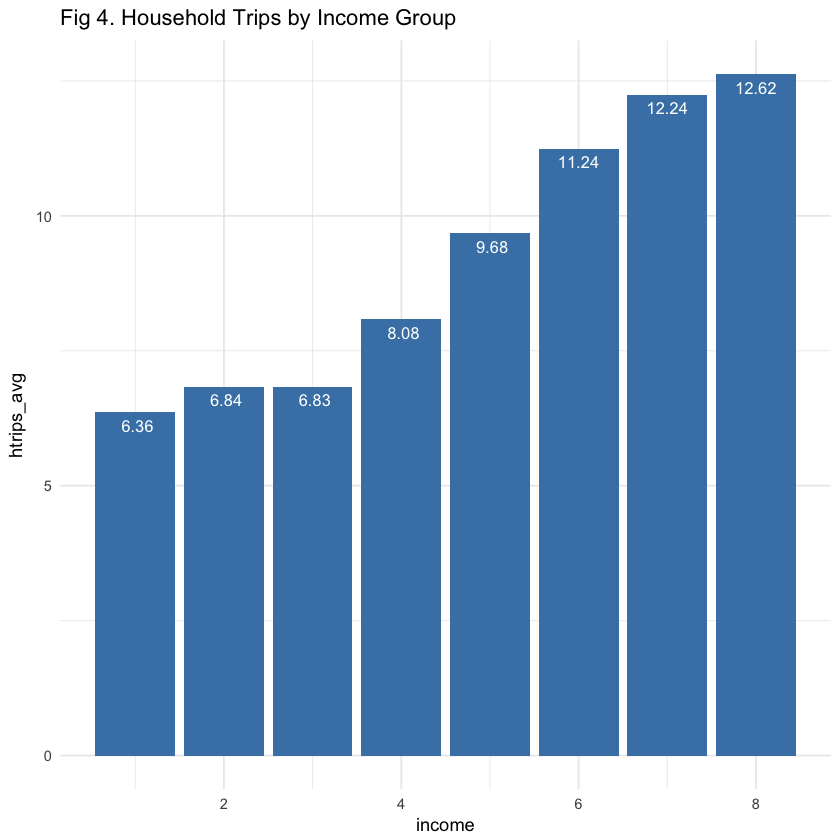

In [11]:
inc.group.summary %>% 
    ggplot(aes(x=income, y=htrips_avg)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=format(htrips_avg, digits = 3)), 
                                vjust=1.6, color="white", size=3.5)+
    labs(title="Fig 4. Household Trips by Income Group") +
    theme_minimal()

In [12]:
inc_cat <- ifelse(df$income <= 2 , 1, ifelse(
    df$income >= 3 & df$income <= 4, 2, ifelse(
        df$income >= 5 & df$income != 99, 3, ifelse(
            df$income == 99, NA, df$income))))

df$inc_cat <- inc_cat
print("Table 6. Frequency of Inc_cat")
inc_cat.group <- group_by(df, inc_cat)  %>%
    filter(complete.cases(inc_cat))
inc_cat.group.summary <- summarize(inc_cat.group, count=n())
inc_cat.group.summary

[1] "Table 6. Frequency of Inc_cat"


inc_cat,count
1,799
2,1222
3,3998


In [13]:
inc_cat.group <- group_by(df, inc_cat)  %>%
    filter(complete.cases(inc_cat))
inc_cat.group.summary <- summarize(inc_cat.group, htrips_avg=mean(htrips))
inc_cat.group.summary

inc_cat,htrips_avg
1,6.649562
2,7.589198
3,11.162081


In [14]:
incval <- ifelse(df$income == 1 , ((14999-0)/2 + 0), ifelse(
    df$income == 2, ((24999-15000)/2 + 15000), ifelse(
        df$income == 3, ((34999-25000)/2 + 25000), ifelse(
            df$income == 4, ((49999-35000)/2 + 35000), ifelse(
                df$income == 5, ((74999-50000)/2 + 50000), ifelse(
                    df$income == 6, ((99999-75000)/2 + 75000), ifelse(
                        df$income == 7, ((149999-100000)/2 + 100000), ifelse(
                            df$income == 8, 250000, ifelse(
                                df$income == 99, NA, df$income)))))))))
df$incval <- incval
print("Comparison of Income and INCVAL")
df %>%
    select(income, incval) %>%
    summary()
print("Standard Deviation of INCVAL:")
sd(df$incval, na.rm=TRUE)

[1] "Comparison of Income and INCVAL"


     income          incval      
 Min.   : 1.00   Min.   :  7500  
 1st Qu.: 4.00   1st Qu.: 42500  
 Median : 5.00   Median : 62500  
 Mean   :11.32   Mean   : 82890  
 3rd Qu.: 7.00   3rd Qu.:125000  
 Max.   :99.00   Max.   :250000  
                 NA's   :430     

[1] "Standard Deviation of INCVAL:"


[1] 62390.21

In [15]:
incval.group <- group_by(df, incval)  %>%
    filter(complete.cases(incval))
incval.group.summary <- summarize(incval.group, count=n(), 
                                  avg_htrips=mean(htrips))
incval.group.summary

incval,count,avg_htrips
7499.5,314,6.359873
19999.5,485,6.837113
29999.5,479,6.828810
42499.5,743,8.079408
62499.5,1321,9.677517
87499.5,1134,11.241623
124999.5,1013,12.244817
250000.0,530,12.622642


In [16]:
cor(df$incval, df$htrips, use="complete.obs")

[1] 0.2277575

In [17]:
cor(df$resty, df$hhveh, use="complete.obs")

[1] -0.3621331

In [18]:
df.xclass <- df %>%
    select(resty, hhveh, htrips) %>%
    filter(resty != 9) %>%
    group_by(., resty, hhveh)  %>%  
    summarize(., count=n(), avg_trips = mean(htrips)) %>% 
    transform(grouping = interaction(resty, hhveh, sep='-'))    
df.xclass

resty,hhveh,count,avg_trips,grouping
1,0,90,8.222222,1-0
1,1,1203,7.142145,1-1
1,2,2351,11.220757,1-2
1,3,994,11.749497,1-3
1,4,333,12.216216,1-4
1,5,105,12.342857,1-5
1,6,42,11.000000,1-6
1,7,12,13.416667,1-7
1,8,12,8.916667,1-8
2,0,26,10.576923,2-0


In [19]:
df.cca <- left_join(df, df.xclass, by=c('resty', 'hhveh'))
df.cca %>% 
    select(resty, hhveh, grouping, htrips, avg_trips)

resty,hhveh,grouping,htrips,avg_trips
1,3,1-3,6,11.749497
1,6,1-6,4,11.000000
1,2,1-2,0,11.220757
1,2,1-2,16,11.220757
1,1,1-1,10,7.142145
1,2,1-2,4,11.220757
1,3,1-3,20,11.749497
1,2,1-2,6,11.220757
1,3,1-3,16,11.749497
3,2,3-2,2,9.241135


In [20]:
df.cca$ResError <- (df.cca$htrips - df.cca$avg_trips)^2
df.cca$RotError <- (df.cca$htrips - mean(df.cca$htrips))^2
df.cca %>% 
    select(resty, hhveh, grouping, htrips, avg_trips, ResError, RotError)

resty,hhveh,grouping,htrips,avg_trips,ResError,RotError
1,3,1-3,6,11.749497,33.0567155,14.55548506
1,6,1-6,4,11.000000,49.0000000,33.81614563
1,2,1-2,0,11.220757,125.9053904,96.33746676
1,2,1-2,16,11.220757,22.8411625,38.25218222
1,1,1-1,10,7.142145,8.1673373,0.03416392
1,2,1-2,4,11.220757,52.1393335,33.81614563
1,3,1-3,20,11.749497,68.0708001,103.73086109
1,2,1-2,6,11.220757,27.2563050,14.55548506
1,3,1-3,16,11.749497,18.0667759,38.25218222
3,2,3-2,2,9.241135,52.4340325,61.07680619


In [21]:
SSE <- sum(df.cca$ResError, na.rm=TRUE)
SST <- sum(df.cca$RotError)
Rsquared <- 1 - (SSE/SST)
print(c(SSE, SST, Rsquared),scientific=FALSE)

[1] 3.640223e+05 3.942217e+05 7.660518e-02


In [26]:
resty1 <- ifelse(df.cca$resty == 1 , 1, 0)
resty2 <- ifelse(df.cca$resty == 2 , 1, 0)
resty3 <- ifelse(df.cca$resty == 3 , 1, 0)
resty4 <- ifelse(df.cca$resty == 4 , 1, 0)

df.cca$resty1 <- resty1
df.cca$resty2 <- resty2
df.cca$resty3 <- resty3
df.cca$resty4 <- resty4

cor(df.cca$resty1, df.cca$htrips)
cor(df.cca$resty2, df.cca$htrips)
cor(df.cca$resty3, df.cca$htrips)
cor(df.cca$resty4, df.cca$htrips)

df.cca %>%
group_by(resty1) %>%
tally()


?cor
lnR1 <- lm(htrips ~ resty1, data=df.cca)
lnR2 <- lm(htrips ~ resty2, data=df.cca)
lnR3 <- lm(htrips ~ resty3, data=df.cca)
lnR4 <- lm(htrips ~ resty4, data=df.cca)
lnhhveh <- lm(htrips ~ hhveh, data=df.cca)

summary(lnR1)
summary(lnR2)
summary(lnR3)
summary(lnR4)
summary(lnhhveh)

[1] 0.1487716

[1] -0.02089604

[1] -0.1277293

[1] -0.06912708

resty1,n
0,1307
1,5142



Call:
lm(formula = htrips ~ resty1, data = df.cca)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.402  -5.402  -1.508   3.598  70.598 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.5080     0.2139   35.10   <2e-16 ***
resty1        2.8936     0.2395   12.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.733 on 6447 degrees of freedom
Multiple R-squared:  0.02213,	Adjusted R-squared:  0.02198 
F-statistic: 145.9 on 1 and 6447 DF,  p-value: < 2.2e-16



Call:
lm(formula = htrips ~ resty2, data = df.cca)

Residuals:
   Min     1Q Median     3Q    Max 
-9.843 -5.843 -1.843  4.157 71.157 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8435     0.0988  99.626   <2e-16 ***
resty2       -0.9711     0.5787  -1.678   0.0934 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.818 on 6447 degrees of freedom
Multiple R-squared:  0.0004366,	Adjusted R-squared:  0.0002816 
F-statistic: 2.816 on 1 and 6447 DF,  p-value: 0.09336



Call:
lm(formula = htrips ~ resty3, data = df.cca)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.243  -5.484  -2.243   3.757  70.757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.2430     0.1051   97.49   <2e-16 ***
resty3       -2.7590     0.2668  -10.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.756 on 6447 degrees of freedom
Multiple R-squared:  0.01631,	Adjusted R-squared:  0.01616 
F-statistic: 106.9 on 1 and 6447 DF,  p-value: < 2.2e-16



Call:
lm(formula = htrips ~ resty4, data = df.cca)

Residuals:
   Min     1Q Median     3Q    Max 
-9.885 -5.885 -1.885  4.115 71.115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.88537    0.09796 100.915  < 2e-16 ***
resty4      -4.23116    0.76049  -5.564 2.75e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.801 on 6447 degrees of freedom
Multiple R-squared:  0.004779,	Adjusted R-squared:  0.004624 
F-statistic: 30.96 on 1 and 6447 DF,  p-value: 2.747e-08



Call:
lm(formula = htrips ~ hhveh, data = df.cca)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.023  -5.462  -1.889   3.538  69.684 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.03529    0.19070   36.89   <2e-16 ***
hhveh        1.42689    0.08478   16.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.653 on 6447 degrees of freedom
Multiple R-squared:  0.04208,	Adjusted R-squared:  0.04194 
F-statistic: 283.2 on 1 and 6447 DF,  p-value: < 2.2e-16
